# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


                     Search Trends
Date                              
2020-05-01 00:00:00             80
2020-05-01 01:00:00             80
2020-05-01 02:00:00             76
2020-05-01 03:00:00             66
2020-05-01 04:00:00             53


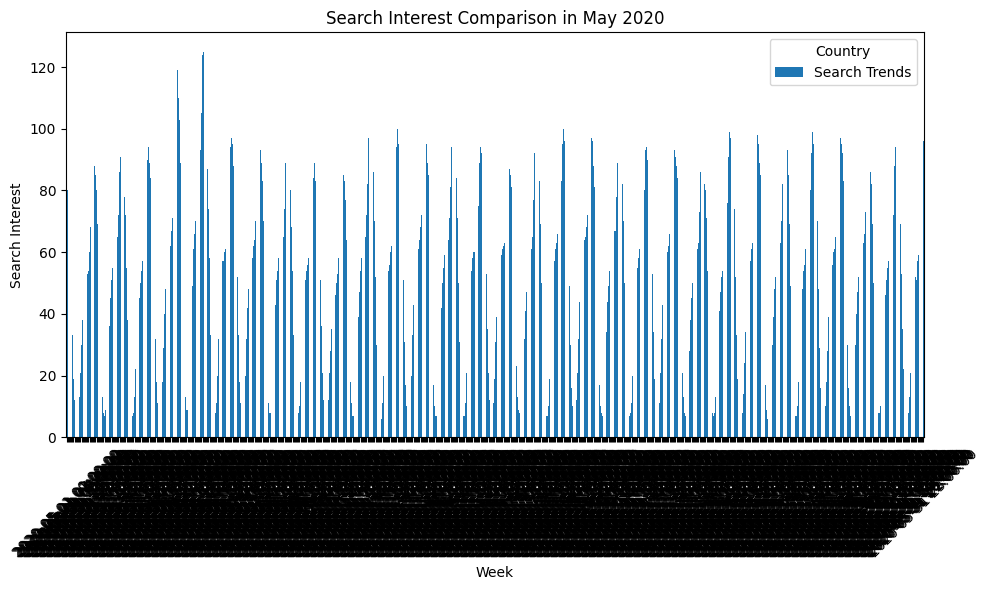

In [5]:
# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05']
print(may_2020_data.head())

# Plot to visualize the data for May 2020
may_2020_data.plot(kind='bar', figsize=(10, 6))
plt.title('Search Interest Comparison in May 2020')
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
total_search_traffic_may_2020 = may_2020_data.sum().sum()


# View the traffic_may_2020 value
total_search_traffic_may_2020

38181

In [7]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum()
median_monthly_traffic = monthly_traffic.median().median()

# View the median_monthly_traffic value
median_monthly_traffic

35172.5

In [8]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
comparison = {
    'Total Search Traffic for May 2020': total_search_traffic_may_2020,
    'Overall Monthly Median Search Traffic': median_monthly_traffic
}

comparison

{'Total Search Traffic for May 2020': 38181,
 'Overall Monthly Median Search Traffic': 35172.5}

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

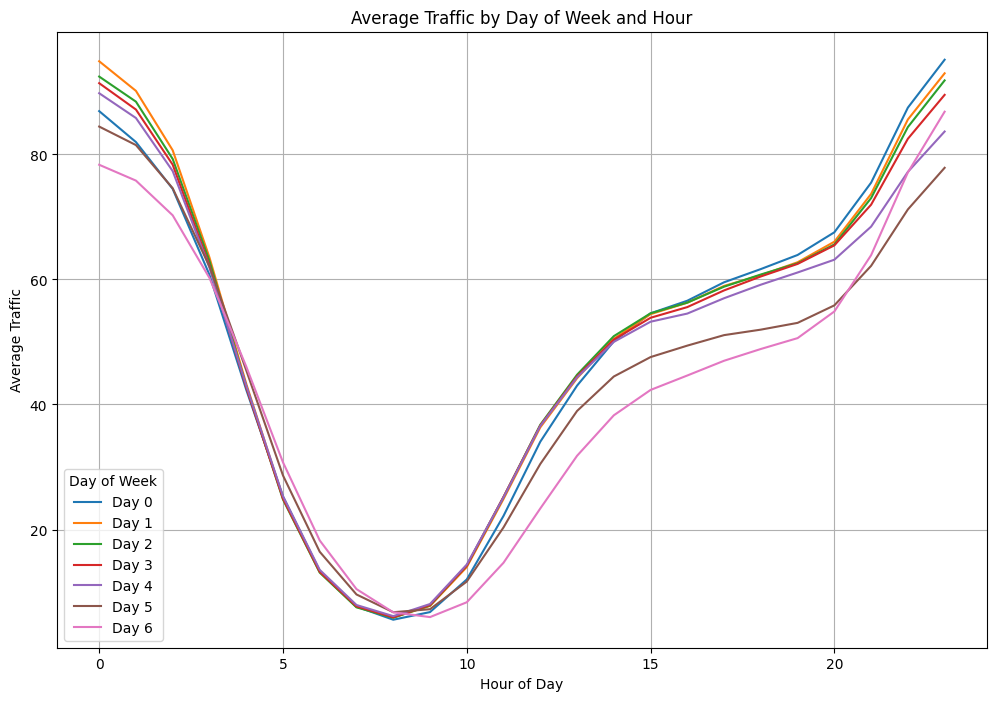

In [9]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour
df_mercado_trends['Day of Week'] = df_mercado_trends.index.dayofweek
df_mercado_trends['Hour'] = df_mercado_trends.index.hour
average_traffic_by_dow_hour = df_mercado_trends.groupby(['Day of Week', 'Hour']).mean()
average_traffic_by_dow_hour = average_traffic_by_dow_hour.reset_index()
plt.figure(figsize=(12, 8))
for day in range(7):
    plt.plot(average_traffic_by_dow_hour[average_traffic_by_dow_hour['Day of Week'] == day]['Hour'],
             average_traffic_by_dow_hour[average_traffic_by_dow_hour['Day of Week'] == day].iloc[:, 2:],
             label=f'Day {day}')

plt.title('Average Traffic by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic')
plt.legend(title='Day of Week')
plt.grid(True)
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

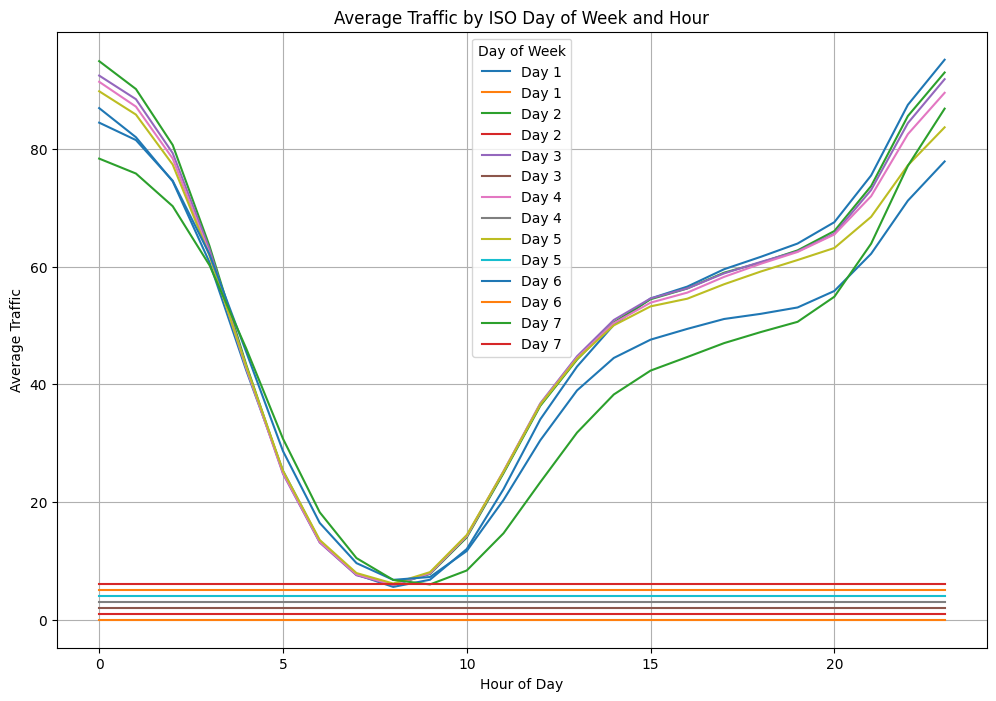

In [10]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
df_mercado_trends['ISO Day of Week'] = df_mercado_trends.index.isocalendar().day
df_mercado_trends['Hour'] = df_mercado_trends.index.hour
average_traffic_by_iso_dow_hour = df_mercado_trends.groupby(['ISO Day of Week', 'Hour']).mean()
average_traffic_by_iso_dow_hour = average_traffic_by_iso_dow_hour.reset_index()
plt.figure(figsize=(12, 8))
for day in range(1, 8):
    plt.plot(average_traffic_by_iso_dow_hour[average_traffic_by_iso_dow_hour['ISO Day of Week'] == day]['Hour'],
             average_traffic_by_iso_dow_hour[average_traffic_by_iso_dow_hour['ISO Day of Week'] == day].iloc[:, 2:],
             label=f'Day {day}')

plt.title('Average Traffic by ISO Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic')
plt.legend(title='Day of Week')
plt.grid(True)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<ipython-input-11-0c4ce32c5869>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


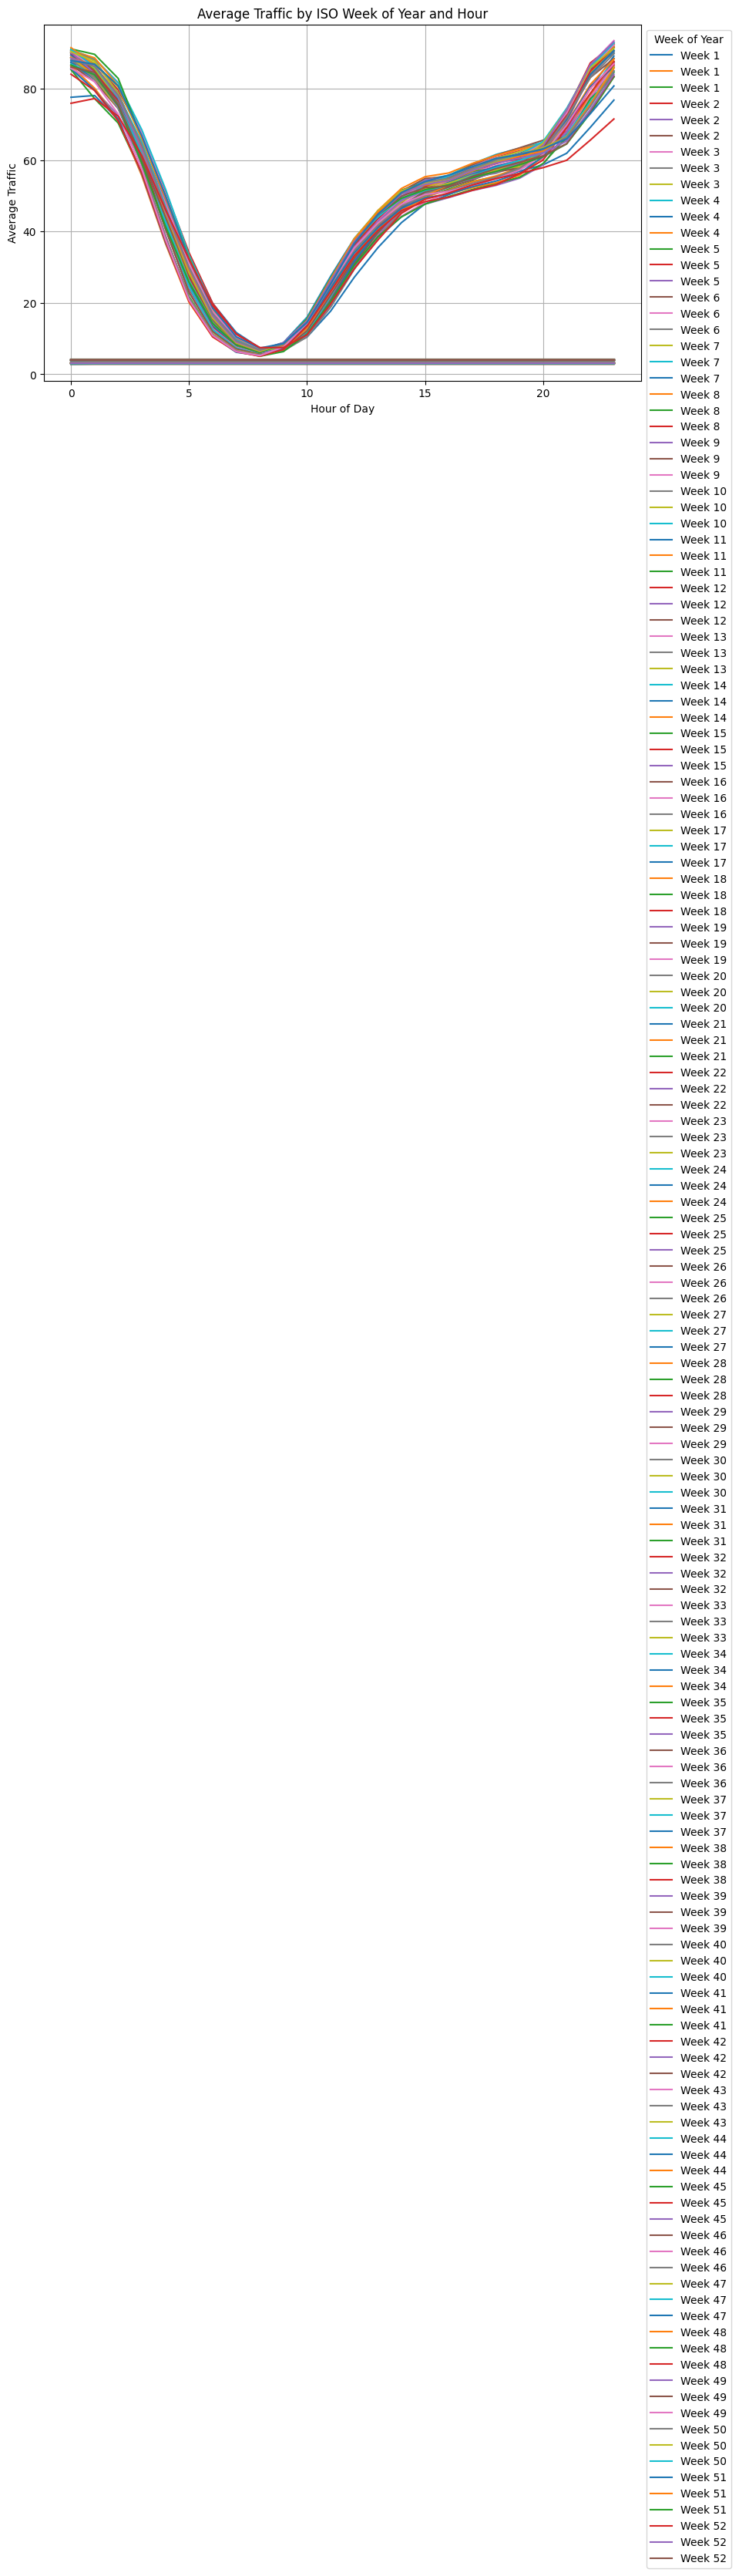

In [11]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
df_mercado_trends['ISO Week of Year'] = df_mercado_trends.index.isocalendar().week
df_mercado_trends['Hour'] = df_mercado_trends.index.hour
average_traffic_by_iso_week_hour = df_mercado_trends.groupby(['ISO Week of Year', 'Hour']).mean()
average_traffic_by_iso_week_hour = average_traffic_by_iso_week_hour.reset_index()
plt.figure(figsize=(10, 6))
for week in average_traffic_by_iso_week_hour['ISO Week of Year'].unique():
    plt.plot(average_traffic_by_iso_week_hour[average_traffic_by_iso_week_hour['ISO Week of Year'] == week]['Hour'],
             average_traffic_by_iso_week_hour[average_traffic_by_iso_week_hour['ISO Week of Year'] == week].iloc[:, 2:],
             label=f'Week {week}')

plt.title('Average Traffic by ISO Week of Year and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic')
plt.legend(title='Week of Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()
# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


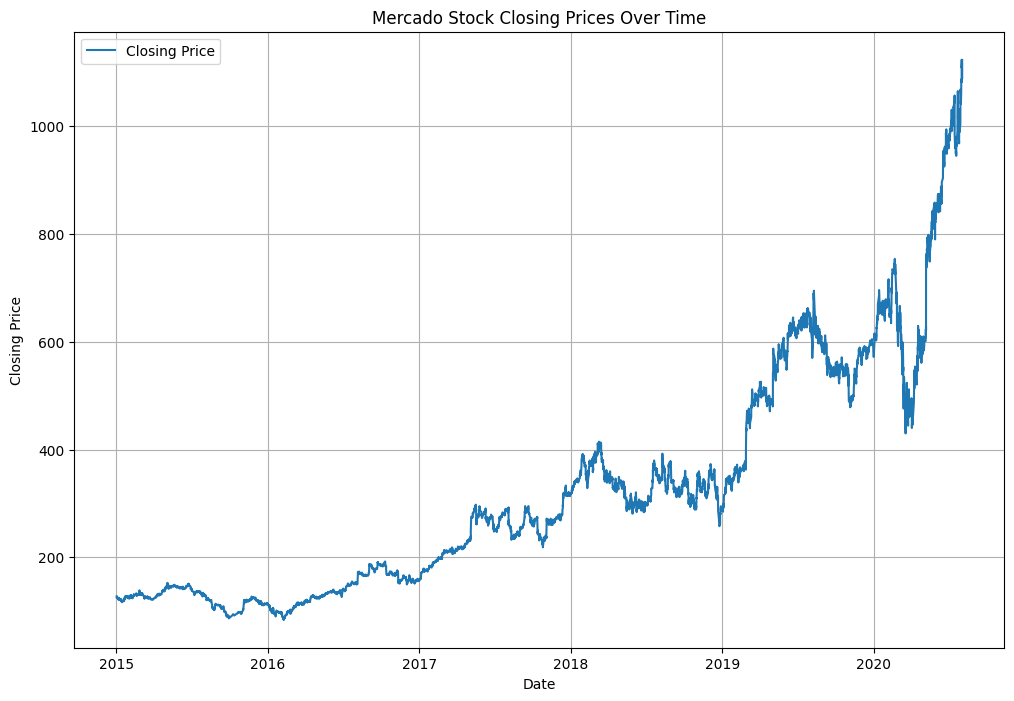

In [29]:
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 8))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Closing Price')
plt.title('Mercado Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna(how='any')


# View the first and last five rows of the DataFrame
print(df_combined.head())

print(df_combined.tail())


                      close  Search Trends  Lagged Search Trends  \
2016-06-01 12:00:00  136.42           33.0                  22.0   
2016-06-01 13:00:00  136.10           40.0                  33.0   
2016-06-01 14:00:00  137.03           45.0                  40.0   
2016-06-01 15:00:00  136.27           48.0                  45.0   
2016-06-02 12:00:00  136.50           35.0                  24.0   

                     Hourly Stock Return  Stock Volatility  
2016-06-01 12:00:00            -0.102519          0.851127  
2016-06-01 13:00:00            -0.234570          0.613401  
2016-06-01 14:00:00             0.683321          0.413654  
2016-06-01 15:00:00            -0.554623          0.525741  
2016-06-02 12:00:00             0.205550          0.463798  
                        close  Search Trends  Lagged Search Trends  \
2020-07-30 15:00:00  1108.000           50.0                  45.0   
2020-07-31 12:00:00  1087.925           32.0                  20.0   
2020-07-31 13:0

#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [38]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_mercado_stock.loc['2020-01-01':'2020-06-30']


# View the first and last five rows of first_half_2020 DataFrame)
print(first_half_2020.head())

print(first_half_2020.tail())

                       close
date                        
2020-01-02 09:00:00  601.085
2020-01-02 10:00:00  601.290
2020-01-02 11:00:00  615.410
2020-01-02 12:00:00  611.400
2020-01-02 13:00:00  611.830
                      close
date                       
2020-06-30 11:00:00  976.17
2020-06-30 12:00:00  977.50
2020-06-30 13:00:00  973.23
2020-06-30 14:00:00  976.50
2020-06-30 15:00:00  984.93


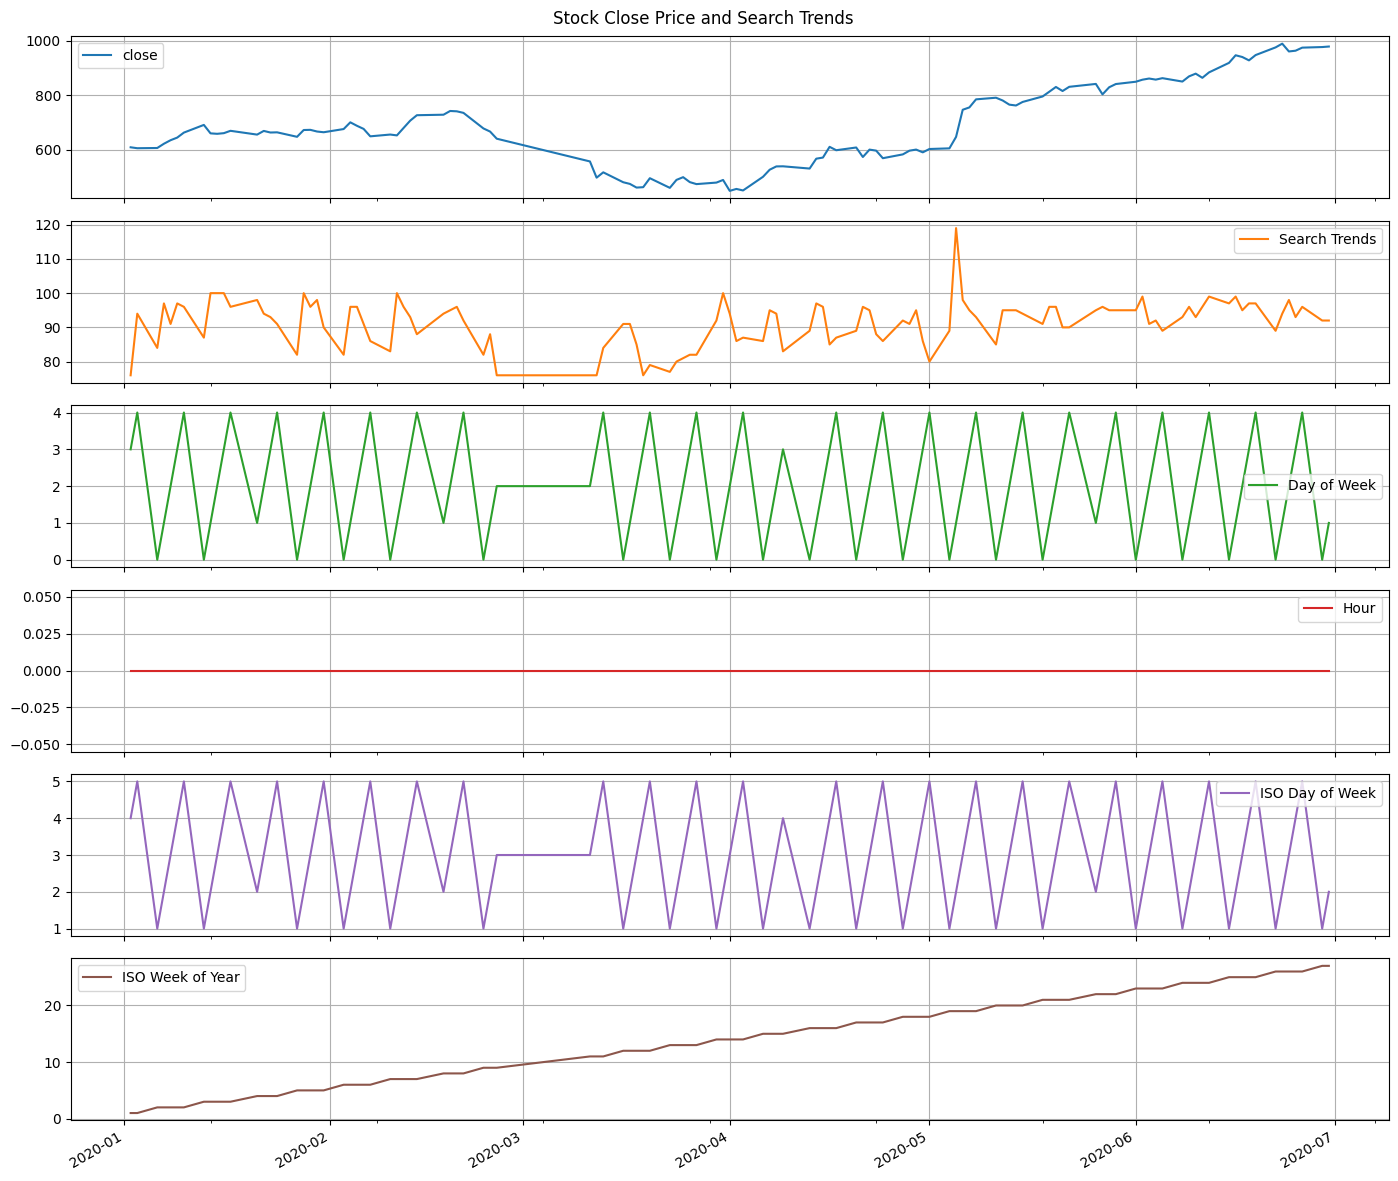

In [16]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
# Resample the stock data to daily frequency
df_mercado_stock_daily = df_mercado_stock['close'].resample('D').mean()
df_combined = pd.concat([df_mercado_stock_daily, df_mercado_trends], axis=1).dropna()
df_combined = df_combined.loc['2020-01-01':'2020-06-30']
df_combined.plot(subplots=True, figsize=(14, 12), grid=True, title='Stock Close Price and Search Trends')
plt.tight_layout()
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [17]:
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()
print(df_mercado_trends.columns)
print(df_mercado_trends.head())

<ipython-input-17-365d8e49024d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


Index(['Search Trends'], dtype='object')
                     Search Trends
Date                              
2016-06-01 00:00:00             97
2016-06-01 01:00:00             92
2016-06-01 02:00:00             76
2016-06-01 03:00:00             60
2016-06-01 04:00:00             38


                     Search Trends  Lagged Search Trends
Date                                                    
2016-06-01 00:00:00             97                   NaN
2016-06-01 01:00:00             92                  97.0
2016-06-01 02:00:00             76                  92.0
2016-06-01 03:00:00             60                  76.0
2016-06-01 04:00:00             38                  60.0


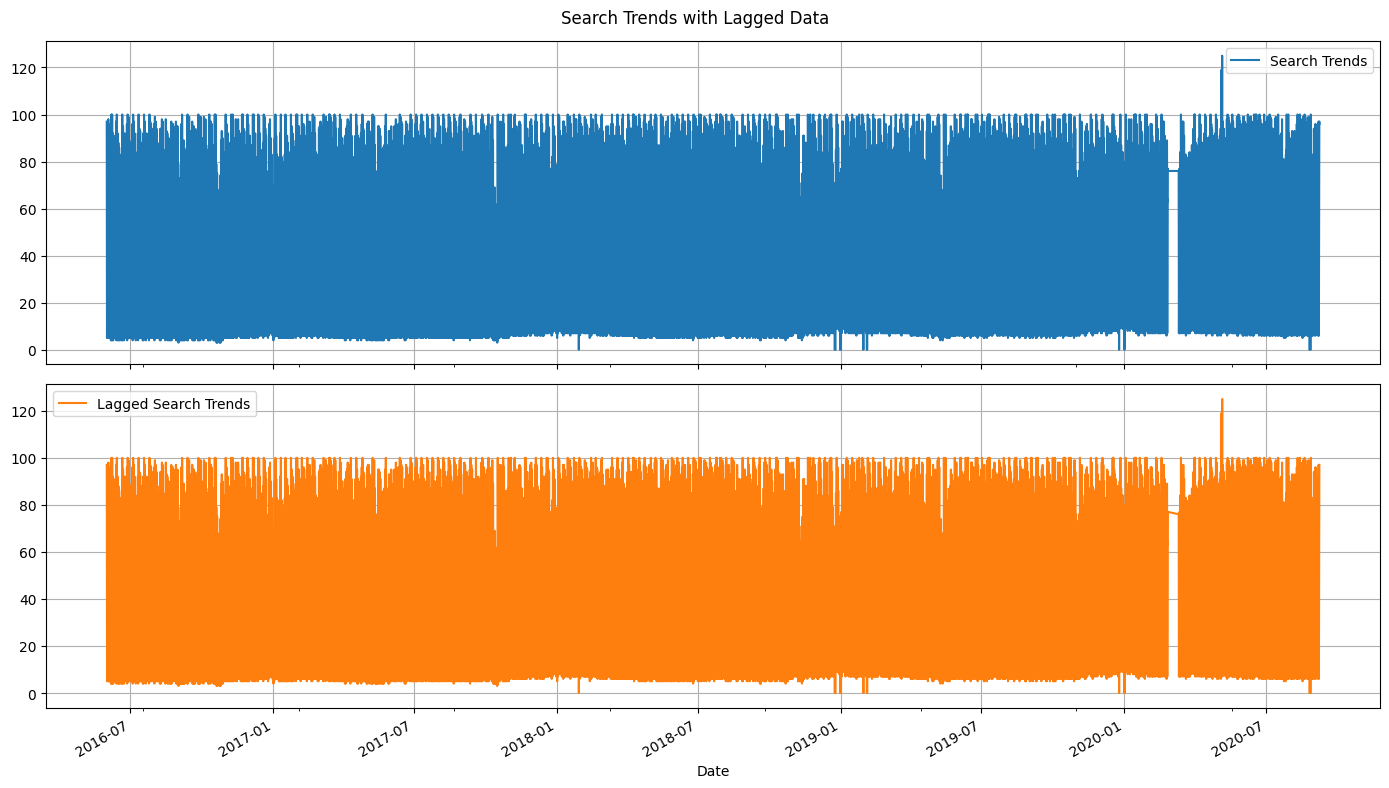

In [18]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
# Create the Lagged Search Trends column by shifting the data by one hour
df_mercado_trends['Lagged Search Trends'] = df_mercado_trends['Search Trends'].shift(1)
print(df_mercado_trends.head())
df_mercado_trends.plot(subplots=True, figsize=(14, 8), grid=True, title='Search Trends with Lagged Data')
plt.tight_layout()
plt.show()




In [32]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_trends['Hourly Stock Return'] = df_mercado_stock['close'].pct_change() * 100
df_mercado_trends['Stock Volatility'] = df_mercado_trends['Hourly Stock Return'].rolling(window=4).std()
print(df_mercado_trends.head())

                     Search Trends  Lagged Search Trends  Hourly Stock Return  \
Date                                                                            
2016-06-01 00:00:00             97                   NaN                  NaN   
2016-06-01 01:00:00             92                  97.0                  NaN   
2016-06-01 02:00:00             76                  92.0                  NaN   
2016-06-01 03:00:00             60                  76.0                  NaN   
2016-06-01 04:00:00             38                  60.0                  NaN   

                     Stock Volatility  
Date                                   
2016-06-01 00:00:00               NaN  
2016-06-01 01:00:00               NaN  
2016-06-01 02:00:00               NaN  
2016-06-01 03:00:00               NaN  
2016-06-01 04:00:00               NaN  


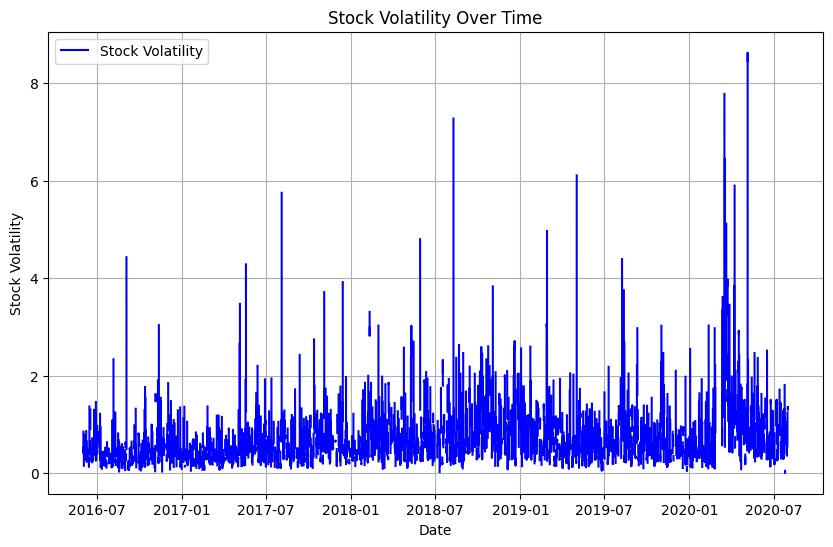

In [33]:
# Visualize the stock volatility
df_mercado_trends = df_mercado_trends.sort_index()
plt.figure(figsize=(10, 6))
plt.plot(df_mercado_trends.index, df_mercado_trends['Stock Volatility'], label='Stock Volatility', color='blue')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Volatility')
plt.legend()
plt.grid(True)
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [35]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_mercado_trends['Hourly Stock Return'] = df_mercado_stock['close'].pct_change() * 100
print(df_mercado_trends.head())

                     Search Trends  Lagged Search Trends  Hourly Stock Return  \
Date                                                                            
2016-06-01 00:00:00             97                   NaN                  NaN   
2016-06-01 01:00:00             92                  97.0                  NaN   
2016-06-01 02:00:00             76                  92.0                  NaN   
2016-06-01 03:00:00             60                  76.0                  NaN   
2016-06-01 04:00:00             38                  60.0                  NaN   

                     Stock Volatility  
Date                                   
2016-06-01 00:00:00               NaN  
2016-06-01 01:00:00               NaN  
2016-06-01 02:00:00               NaN  
2016-06-01 03:00:00               NaN  
2016-06-01 04:00:00               NaN  


In [36]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
print(df_mercado_trends.head())

print(df_mercado_trends.tail())

                     Search Trends  Lagged Search Trends  Hourly Stock Return  \
Date                                                                            
2016-06-01 00:00:00             97                   NaN                  NaN   
2016-06-01 01:00:00             92                  97.0                  NaN   
2016-06-01 02:00:00             76                  92.0                  NaN   
2016-06-01 03:00:00             60                  76.0                  NaN   
2016-06-01 04:00:00             38                  60.0                  NaN   

                     Stock Volatility  
Date                                   
2016-06-01 00:00:00               NaN  
2016-06-01 01:00:00               NaN  
2016-06-01 02:00:00               NaN  
2016-06-01 03:00:00               NaN  
2016-06-01 04:00:00               NaN  
                     Search Trends  Lagged Search Trends  Hourly Stock Return  \
Date                                                                   

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [39]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_mercado_trends[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()
print(correlation_table)

                      Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.201476   
Lagged Search Trends         -0.201476              1.000000   
Hourly Stock Return           0.044124             -0.023381   

                      Hourly Stock Return  
Stock Volatility                 0.044124  
Lagged Search Trends            -0.023381  
Hourly Stock Return              1.000000  


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [77]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends_reset = df_mercado_trends_reset.rename(columns={'Date': 'ds', 'Hourly Stock Return': 'y'})

# Drop an NaN values from the prophet_df DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
print(df_mercado_trends_reset.head())

print(df_mercado_trends_reset.tail())

                    ds  Search Trends  Lagged Search Trends         y  \
12 2016-06-01 12:00:00             33                  22.0 -0.102519   
13 2016-06-01 13:00:00             40                  33.0 -0.234570   
14 2016-06-01 14:00:00             45                  40.0  0.683321   
15 2016-06-01 15:00:00             48                  45.0 -0.554623   
36 2016-06-02 12:00:00             35                  24.0  0.205550   

    Stock Volatility  
12          0.851127  
13          0.613401  
14          0.413654  
15          0.525741  
36          0.463798  
                       ds  Search Trends  Lagged Search Trends         y  \
36160 2020-07-30 15:00:00             50                  45.0 -1.350641   
36181 2020-07-31 12:00:00             32                  20.0 -1.614697   
36182 2020-07-31 13:00:00             41                  32.0  0.723855   
36183 2020-07-31 14:00:00             47                  41.0  1.355174   
36184 2020-07-31 15:00:00             53   

In [69]:
# Call the Prophet function, store as an object
model = Prophet()

In [78]:
# Fit the time-series model.
model.fit(df_mercado_trends_reset)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfxtpy6s/yodydss4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfxtpy6s/qcgv5jyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96929', 'data', 'file=/tmp/tmpzfxtpy6s/yodydss4.json', 'init=/tmp/tmpzfxtpy6s/qcgv5jyj.json', 'output', 'file=/tmp/tmpzfxtpy6s/prophet_model2mqs441n/prophet_model-20240714223654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:36:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:36:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')


# View the last five rows of the future_mercado_trends DataFrame
print(future_mercado_trends.tail())

                      ds
6006 2020-10-22 19:00:00
6007 2020-10-22 20:00:00
6008 2020-10-22 21:00:00
6009 2020-10-22 22:00:00
6010 2020-10-22 23:00:00


In [81]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
print(forecast_mercado_trends.head())

                   ds     trend  yhat_lower  yhat_upper  trend_lower  \
0 2016-06-01 12:00:00  1.210958   -1.027073    1.056454     1.210958   
1 2016-06-01 13:00:00  1.210953   -1.068685    1.040997     1.210953   
2 2016-06-01 14:00:00  1.210949   -0.988340    1.145498     1.210949   
3 2016-06-01 15:00:00  1.210945   -1.156412    0.923019     1.210945   
4 2016-06-02 12:00:00  1.210858   -1.146426    1.039370     1.210858   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     1.210958       -1.210877             -1.210877             -1.210877   
1     1.210953       -1.193309             -1.193309             -1.193309   
2     1.210949       -1.201172             -1.201172             -1.201172   
3     1.210945       -1.223595             -1.223595             -1.223595   
4     1.210858       -1.258353             -1.258353             -1.258353   

      daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
0 -1.112898  ... -0.062167    

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

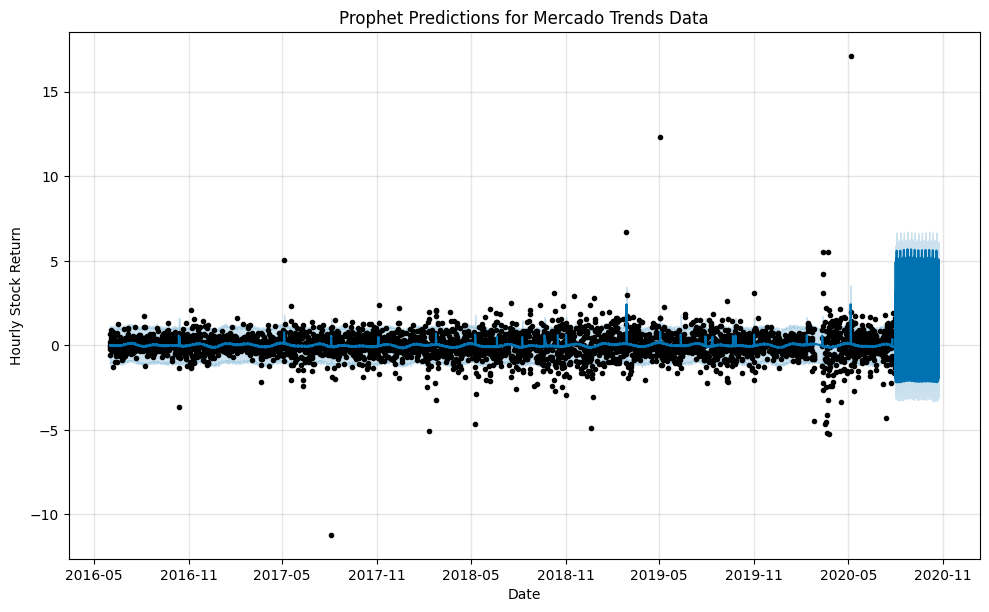

In [82]:
# Plot the Prophet predictions for the Mercado trends data
fig = model.plot(forecast_mercado_trends)
plt.title('Prophet Predictions for Mercado Trends Data')
plt.xlabel('Date')
plt.ylabel('Hourly Stock Return')
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [83]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View only the yhat, yhat_lower, and yhat_upper columns from the DataFrame
forecast_subset = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

print(forecast_subset.head())
print(forecast_subset.tail())

                         yhat  yhat_lower  yhat_upper
ds                                                   
2016-06-01 12:00:00  0.000080   -1.027073    1.056454
2016-06-01 13:00:00  0.017645   -1.068685    1.040997
2016-06-01 14:00:00  0.009778   -0.988340    1.145498
2016-06-01 15:00:00 -0.012650   -1.156412    0.923019
2016-06-02 12:00:00 -0.047495   -1.146426    1.039370
                         yhat  yhat_lower  yhat_upper
ds                                                   
2020-10-22 19:00:00  5.075756    4.038642    6.116923
2020-10-22 20:00:00  3.772433    2.693000    4.800743
2020-10-22 21:00:00  0.908471   -0.303309    1.941760
2020-10-22 22:00:00 -1.571173   -2.645059   -0.497026
2020-10-22 23:00:00 -1.941508   -3.009910   -0.900670


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

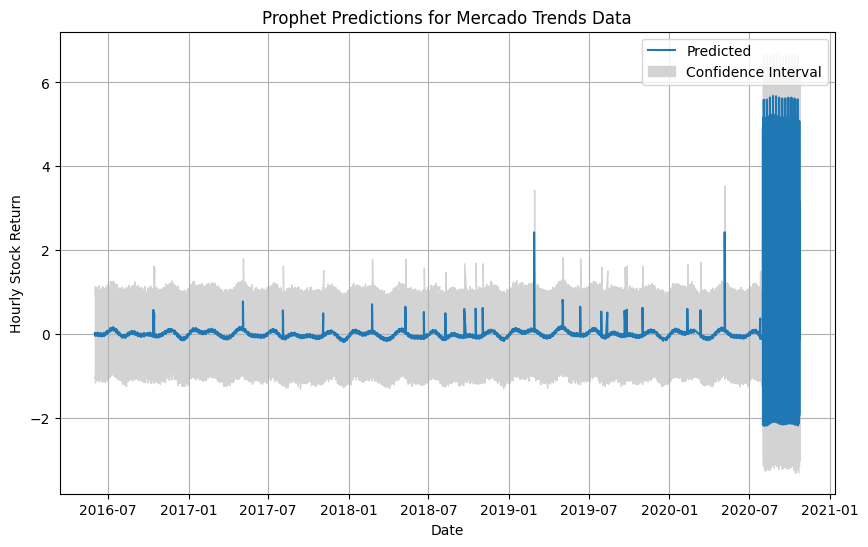

In [84]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
plt.figure(figsize=(10, 6))
plt.plot(forecast_subset.index, forecast_subset['yhat'], label='Predicted')
plt.fill_between(forecast_subset.index, forecast_subset['yhat_lower'], forecast_subset['yhat_upper'], color='lightgrey', label='Confidence Interval')
plt.title('Prophet Predictions for Mercado Trends Data')
plt.xlabel('Date')
plt.ylabel('Hourly Stock Return')
plt.legend()
plt.grid(True)
plt.show()

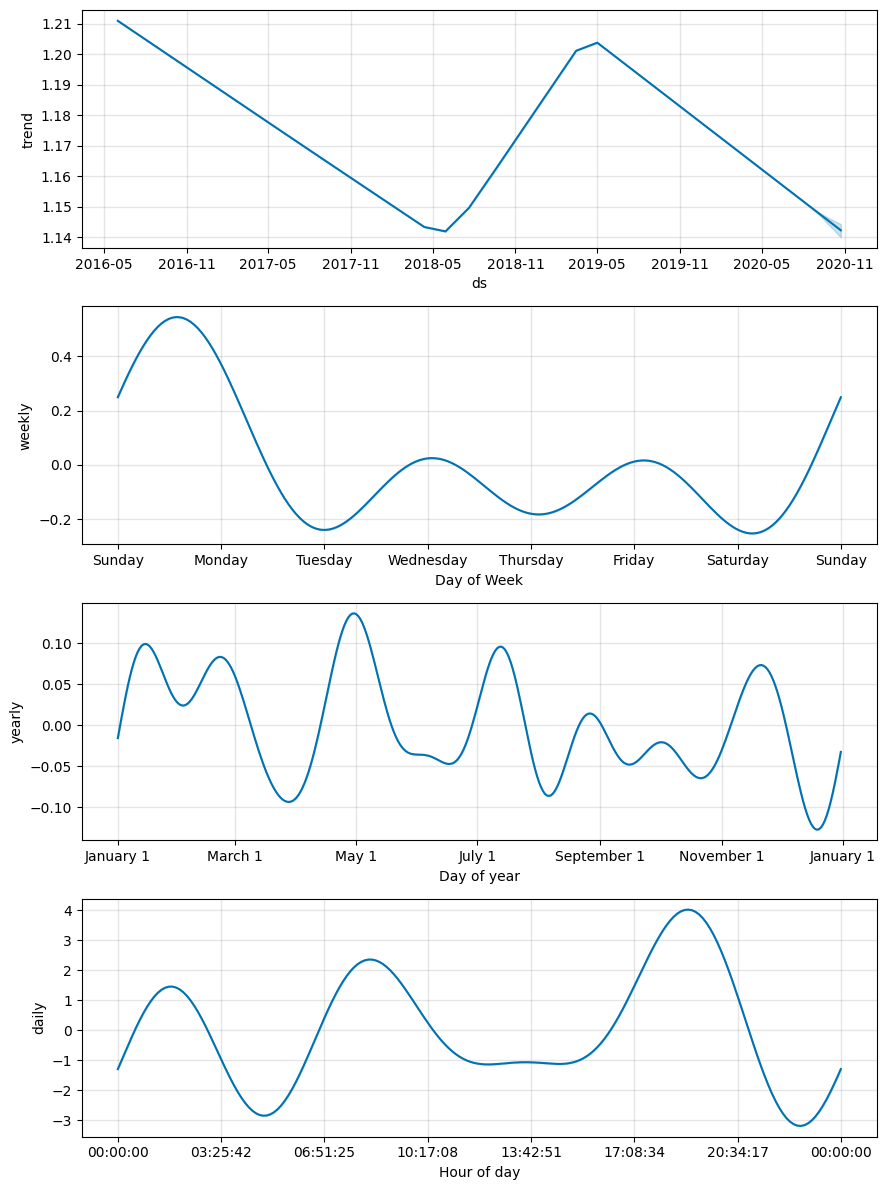

In [85]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
fig_components = model.plot_components(forecast_mercado_trends)
plt.show()

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**

In [86]:
daily_seasonality = model.predict_seasonal_components(future_mercado_trends)['daily']
max_daily_value = daily_seasonality.max()
max_daily_time = daily_seasonality.idxmax()
print(f"The time of day with the greatest popularity is: {max_daily_time} with a value of {max_daily_value}")

The time of day with the greatest popularity is: 4470 with a value of 4.021889272414853


**Question:** Which day of week gets the most search traffic?
   
**Answer:**

In [87]:
weekly_seasonality = model.predict_seasonal_components(future_mercado_trends)['weekly']
max_weekly_value = weekly_seasonality.max()
max_weekly_day = weekly_seasonality.idxmax()
print(f"The day of the week with the most search traffic is: {max_weekly_day} with a value of {max_weekly_value}")

The day of the week with the most search traffic is: 4561 with a value of 0.543699859486893


**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**


In [88]:
yearly_seasonality = model.predict_seasonal_components(future_mercado_trends)['yearly']
min_yearly_value = yearly_seasonality.min()
min_yearly_time = yearly_seasonality.idxmin()
print(f"The lowest point for search traffic in the calendar year is: {min_yearly_time} with a value of {min_yearly_value}")

The lowest point for search traffic in the calendar year is: 2462 with a value of -0.12725325479071845
